# Ejercicio 1: Método de la bisección

Implementar el método de la bisección. Debe tomar como argumentos, la función a evaluar, el intervalo inicial, y los criterios de corte. Debe devolver el valor  hallado.

Recordar que la formulación del método tiene como objetivo encontrar $\color{orange}{x}$ que iguale a cero una ecuación.

Hint: usar como base el pseudocódigo provisto en la teórica

<center>
<img src="http://www.frsn.utn.edu.ar/gie/an/enl/Metodobiseccion.gif">
</center>

Implementamos el método de la bisección siguiendo cada uno de los pasos descriptos en el pseudocódigo.

In [2]:
def bisection(f, interval0, MAXITER, TOL):
    a,b = interval0[0], interval0[1] #definimos el intervalo
    fa, fb = f(a), f(b) #calculamos el valor de la función
    fc = 2*TOL #esto está solamente para que entre por primera vez al while
    cont = 1  #nuestro contador 
    while (abs(fc) >= TOL) and (cont < MAXITER): #condiciones de corte
        c = (a+b)/2 #nuestro punto medio, la bisección
        fc = f(c) #valor en este punto
        if f(c) == 0: #si encontramos la solución devolver ese valor
            return c
        
        if f(a)*fc < 0: #manera muy ingeniosa de determinar si es creciente o decreciente la función
            b = c
        else:
            a = c
        
        cont += 1 
    
    if abs(f(c)) <= TOL:
        return (a+b)/2
    else:
        print(f"El método falló despues de {MAXITER} iteraciones")
        return None

# Ejercicio 2:

Usar el método de la bisección para resolver el siguiente problema 

$$
\color{orange}{x^6-4x^5+\sin (x)-e^x+\pi =0}
$$

Graficar la función en el intervalo $\color{orange}{[-1,1]}$ y usar este intervalo como el inicial 

Usar `numpy`  y `matplotlib`.


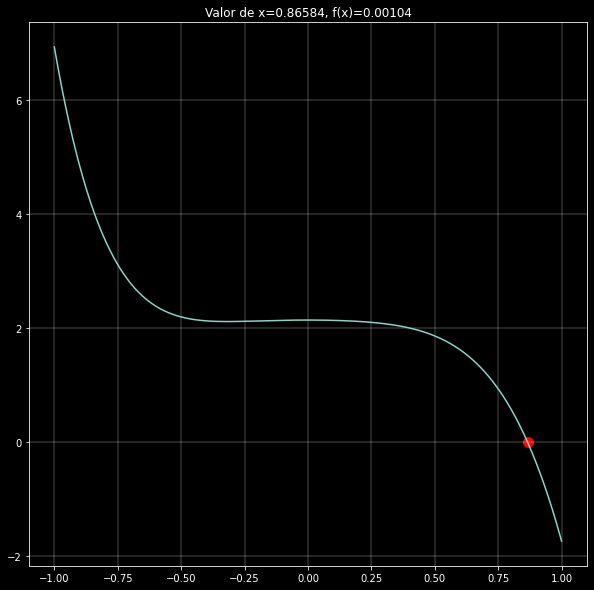

In [3]:
# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#definimos el array para graficar la función
x = np.linspace(-1,1, 1e4)

# imlpementamos f siendo esta el lado izquierdo de la ecuación
def f(x):
    return x**6-4*(x**5)+np.sin(x) - np.exp(x) + np.pi

#calculamos los valores de f en los puntos x que definimos anteriormente
y = f(x)


#graficamos para ver como era la forma de la función
fig = plt.figure(figsize=(10,10))
_ = plt.grid(linewidth = 0.3)
_ = plt.plot(x,y)

# usamos el método del punto anterior
c = bisection(f, [-1,1], 1e6, 0.001)
fc = f(c)

_ = plt.scatter(c, f(c), s=100, c='r')
_ = plt.title(f"Valor de x={c:.5f}, f(x)={fc:.5f}")

# Ejercicio 3

Modificar el método `fit` de la clase `LinearRegression` para poder guardar el historial del valores de la función error. Graficar el error en función del tiempo.


In [11]:
class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo 

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente               
            w = w - self.learning_rate * grad #acá esta la papa        
            if self.record_history: 
                self.w_history.append(w)
            t += 1
        return w


In [12]:
class LinearRegression:
    def __init__(self, add_bias=True): 
        self.add_bias = add_bias #el bias es la constante de nuestro modelo lineal
        pass
            
    def fit(self, x, y, optimizer):
        
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)]) 
        
        N,D = x.shape
        
        def gradient(x, y, betas):                          
            yh =  x @ betas # la operación calcula el producto matricial
            N, D = x.shape 
            grad = -2*np.dot(y-yh, x)/N
            return grad
        
        betas0 = np.zeros(D) #betas iniciales                                
        self.betas = optimizer.run(gradient, x, y, betas0) #corremos el optimizador  
        
        #definimos la función MSE que toma a las variables predecidas y a las variables observadas
        def MSE(y,yh):
            e = (y-yh)**2
            return np.mean(e)
        
        #definimos a la función que nos devuleve el error usando las variables predichas y los betas históricos que devuelve
        # el optimizador
        def get_error_history(x,y,history_betas):
            error_history = []
            #para cada uno  de los beta de entrenamiento tenemos que calcular la predicción yh
            for betas in history_betas:
                yh = x@betas #calculo de yh, recuerden @ es el producto matricial
                error_history.append(MSE(y,yh)) # appendeamos el valor del error cuadrático medio para las predicciones de cada paso
            return error_history #devolvemos el historial
        
        self.error_history = get_error_history(x,y,optimizer.w_history) # se lo asignamos a un atribut de la clase        
        
        return self
    
    def predict(self, x):
        if self.add_bias: 
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.betas
        return yh

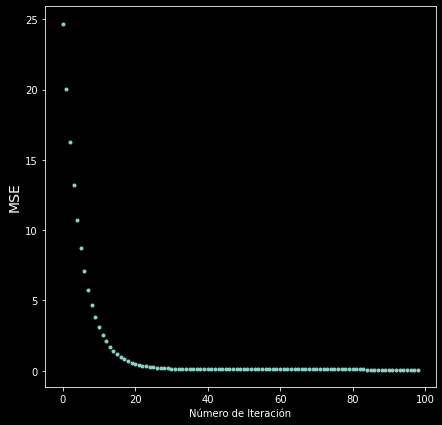

In [13]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() #inicializamos nuestro objeto regresion 
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))

_ = plt.plot(np.arange(0,100-1), model.error_history, '.') # plotteamos la variable de interés

_ = plt.ylabel('MSE', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 4

Modificar el método  `run` de la clase `GradientDescent` para guardar el valor del gradiente en cada paso del entrenamiento. Graficar la evolución del mismo.

In [14]:
class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []
            #si queremos guardar la historia también guardaremos el historial del gradiente
            self.grad_history = []                 
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo 

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf 
        t = 1 
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: 
            grad = gradient_fn(x, y, w) 
            w = w - self.learning_rate * grad        
            if self.record_history: 
                self.w_history.append(w)
                #guardamos en nuestro nuevo atributo 
                self.grad_history.append(np.linalg.norm(grad))
            t += 1
        return w


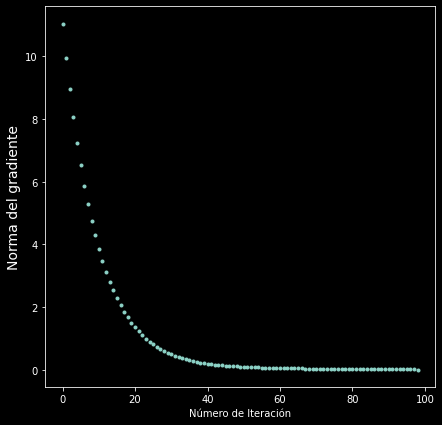

In [19]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() 
model.fit(x_rl,y_rl, optimizer) 

_ = plt.figure(figsize=(7,7))

_ = plt.plot(np.arange(len(optimizer.grad_history)), optimizer.grad_history  , '.')#graficamos una vez más la variable de interés

_ = plt.ylabel('Norma del gradiente', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 5

Implementar  un método que determine si la figura geométrica de un disco de radio 1 es convexa.


### Paso 1

Implementar una función que permita determinar si un punto pertenece al conjunto definido como Disco.

$$
\color{orange}{D = \{(x,y) \ : \ \|(x,y)\|_2 \leq 1 \}}
$$


Una función muy sencilla que calcula la norma de un vector y nos devuelve un booleano en función de si esa norma es mayor o menor que 1.

In [25]:
import numpy as np

def in_disk(x, y, radius=1):
    norm  = np.sqrt(x**2 + y**2)
    if norm <= radius:
        return True
    
    return False
    

### Paso 2

Implementar una función que dos puntos, y construya una recta (la recta va a ser una serie de puntos pertenecientes a la recta). 


Utilizamos las funcionalidades de numpy para construir una  serie de puntos pertenecientes a una recta. Para hacer esto sencillamente dividimos los intervalos en x y los intervalos en y una misma cantidad de puntos.

In [24]:
def build_line(x1, y1, x2, y2, NUM_POINTS=100):
    xs = np.linspace(x1,x2,NUM_POINTS)
    ys = np.linspace(y1,y2,NUM_POINTS)
    
    return xs, ys

### Paso 3

Implementar el método que chequee si los puntos pertenecientes a la recta pertenecen al conjunto disco. Usar puntos aleatorios asegurandose que caigan dentro de un círculo de radio 1. Esto es fácil usando coordenadas polares. Más info <a href="https://es.wikipedia.org/wiki/Coordenadas_polares"> acá</a>

Ahora que tenemos la función para construir los puntos asi como la función para determinar si un punto pertenece, las unimos en un ciclo iterativo muy sencillo para corroborar uno y todos los puntos de la recta construida. Para asegurarnos que los puntos iniciales que establecen la recta están dentro del círculo aprovechamos la facilidad de las coordenadas polares.

In [26]:
def is_disk_convex(NUM_POINTS = 100):
    #generamos dos pares de puntos dentro del circulo teniendo en cuenta
    thetas = np.random.uniform(low=-np.pi, high=np.pi, size=2)
    radiuses = np.random.random(2)
    x1,x2 = radiuses*np.cos(thetas) 
    y1,y2 = radiuses*np.sin(thetas)
    
    xs,ys = build_line(x1,y1,x2,y2)
    for x,y in zip(xs, ys):
        if not in_disk(x,y, radius=1):
            return False
    return True

is_disk_convex()

True